<h1>Tarea</h1>
<h3>Explorando la Reputación Corporativa</h3>

<b>Integrantes:</b>
- Adrián Bedón
- Jairo Bedón
- Andrea Cobos
- Xavier Ramos

<h1>Contexto</h1>

En la era digital, la reputación corporativa se ha convertido en un activo crucial para las empresas, influyendo en su éxito, su capacidad para atraer talento y su relación con los consumidores. En este contexto, el análisis de sentimiento emerge como una herramienta poderosa para comprender la percepción pública de una empresa en línea.

El análisis de sentimiento es una técnica que permite identificar, cuantificar y analizar las emociones y opiniones expresadas en texto, ya sea en redes sociales, reseñas de productos, artículos de noticias o cualquier otro tipo de contenido en línea. Al aplicar esta técnica al estudio de la reputación corporativa, se puede obtener una visión profunda de cómo una empresa es percibida por el público en general y cómo estas percepciones pueden influir en su imagen y desempeño.

En esta serie de artículos, nos adentraremos en el emocionante campo del análisis de sentimiento aplicado a la reputación corporativa. Exploraremos cómo esta técnica puede ayudar a las empresas a monitorear la opinión pública, identificar tendencias emergentes, evaluar la satisfacción del cliente y detectar posibles problemas de reputación.

<h1>Asignación</h1>

Después de revisar los cuaderno sobre "Explorando la Reputación Corporativa: Parte de Web Scraping" y "Explorando la Reputación Corporativa: Parte de Análisis de Sentimiento", tenemos el objetivo de desarrollar un sistema de análisis de sentimiento basado en Big Data para explorar la reputación corporativa de Facebook, con el fin de comprender la percepción del público y detectar tendencias y patrones relevantes.

Como experto en Big Data, se le solicita desarrollar este sistema de análisis de sentimiento utilizando técnicas avanzadas de procesamiento de lenguaje natural y aprendizaje automático. El sistema deberá recopilar y analizar datos de diversas fuentes en línea, como redes sociales, foros, noticias y reseñas de productos, para identificar la opinión y el sentimiento del público hacia la Empresa.

<h1>Tareas</h1>

- Recopilación de datos: Obtener datos en línea de diversas fuentes relevantes para la reputación corporativa de [Nombre de la Empresa], como Twitter, Facebook, blogs, noticias, etc.
- Preprocesamiento de datos: Limpiar y preparar los datos para su análisis, incluyendo la eliminación de ruido, la normalización de texto y la tokenización.
- Desarrollo de algoritmos de análisis de sentimiento: Diseñar y desarrollar algoritmos de análisis de sentimiento utilizando técnicas de aprendizaje automático, como modelos de clasificación de texto y análisis de emociones.
- Implementación del sistema: Implementar el sistema de análisis de sentimiento en una infraestructura de Big Data escalable y eficiente, asegurando su capacidad para procesar grandes volúmenes de datos en tiempo real.
- Evaluación del sistema: Evaluar el rendimiento del sistema utilizando métricas adecuadas, como precisión, recall y F1-score, y realizar ajustes según sea necesario.
- Generación de informes: Generar informes periódicos que resuman los resultados del análisis de sentimiento y destaquen las tendencias y patrones identificados.

<h1>Código en Python</h1>

En esta sección, es fundamental cargar las diferentes bibliotecas que se utilizarán en el estudio para garantizar un análisis efectivo y eficiente de los datos. A continuación, se proporciona un ejemplo de cómo podrías cargar estas bibliotecas en Python

In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from matplotlib import pyplot as plt
import re
import contractions
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import itertools


Los datos esta disponible para descargar directamente desde el repositorio de <a href='https://drive.google.com/file/d/1TwSiWvg-WAYfpgzsC3L-Dg3BEEIJkD-N/view?usp=drive_link'>datos</a>.

El primer paso consiste en cargar los datos que utilizaremos para entrenar nuestros modelos.

In [2]:
RANDOMSEED=56

df = pd.read_csv(r'C:\Users\arbed\Downloads\sentanal\training.csv',lineterminator='\n')
display(df.shape)
display(df.head())
display(df.info())

(105765, 3)

,User,Date Created,Tweet
0,eezypeezy,2018-01-01 23:59:58+00:00,#Twitter #Facebook #USA - - Watch this encoura...
1,avehhx3,2018-01-01 23:59:54+00:00,Who do these people on Facebook think is gonna...
2,CMVibe1,2018-01-01 23:59:54+00:00,I posted a new video to Facebook https://t.co/...
3,AngelVerdugoB,2018-01-01 23:59:45+00:00,Sigueme en Youtube https://t.co/RNGdKXwXgx Ins...
4,ritenag,2018-01-01 23:59:45+00:00,#Facebook’s Customer #Chat Plugin Is Coming To...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105765 entries, 0 to 105764
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   User          105765 non-null  object
 1   Date Created  105765 non-null  object
 2   Tweet         105765 non-null  object
dtypes: object(3)
memory usage: 2.4+ MB


None

En esta etapa inicial, nos enfocamos en cargar específicamente la parte de los tweets de nuestros datos. Descartamos otras columnas o atributos que no son relevantes para nuestro análisis o modelo, centrándonos únicamente en la información contenida en los tweets.

In [3]:
df = df[['Tweet']]
display(df.head())

,Tweet
0,#Twitter #Facebook #USA - - Watch this encoura...
1,Who do these people on Facebook think is gonna...
2,I posted a new video to Facebook https://t.co/...
3,Sigueme en Youtube https://t.co/RNGdKXwXgx Ins...
4,#Facebook’s Customer #Chat Plugin Is Coming To...


<h1>Proceso de Limpieza</h1>
Después de cargar los datos de los tweets, procedemos a realizar una limpieza exhaustiva de los mensajes mediante el desarrollo de una función especializada para este propósito. El proceso comienza convirtiendo todos los mensajes a formato de cadena de texto y luego los transformamos a minúsculas para mantener una coherencia en el análisis. Posteriormente, eliminamos todas las URLs, las menciones de usuarios (@user), los hashtags (#), emojis, números y signos de puntuación.

In [4]:
def data_cleaning(tweet):
  tweet = str(tweet)
  tweet = tweet.lower()
  tweet = re.sub('http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
  tweet = re.sub('\@\w+|\#', '', tweet)

  regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
  regrex_pattern.sub('',tweet)

  tweet = ''.join(c for c in tweet if not c.isdigit())

  expanded = []
  for word in tweet.split():
    expanded.append(contractions.fix(word))
  tweet =  ' '.join(expanded)

  tweet = re.sub('[^\w\s]', '', tweet)

  stop_words = set(stopwords.words('english'))
  tweet_tokens = word_tokenize(tweet)
  filtered_texts = [word for word in tweet_tokens if word not in stop_words]

  lemma = WordNetLemmatizer()
  lemma_texts = (lemma.lemmatize(text, pos='a') for text in filtered_texts)

  return " ".join(lemma_texts)


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\@'
<>:24: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\@'
<>:24: SyntaxWarning: invalid escape sequence '\w'
C:\Users\arbed\AppData\Local\Temp\ipykernel_9136\281179059.py:4: SyntaxWarning: invalid escape sequence '\S'
  tweet = re.sub('http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
C:\Users\arbed\AppData\Local\Temp\ipykernel_9136\281179059.py:5: SyntaxWarning: invalid escape sequence '\@'
  tweet = re.sub('\@\w+|\#', '', tweet)
C:\Users\arbed\AppData\Local\Temp\ipykernel_9136\281179059.py:24: SyntaxWarning: invalid escape sequence '\w'
  tweet = re.sub('[^\w\s]', '', tweet)


In [5]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')
df.Tweet = df['Tweet'].apply(data_cleaning)
display(df.Tweet.head())

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\arbed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arbed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0         twitter facebook usa watch encouraging video
1    people facebook think going read paragraphs re...
2                            posted new video facebook
3        sigueme en youtube instagram twitter facebook
4    facebooks customer chat plugin coming website ...
Name: Tweet, dtype: object

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Importamos el utilitario nltk y descargamos los paquetes necesario para el procesamientos de los mensajes de twitter.</i></p>
</div>

In [6]:
display(df[df.duplicated()].shape)
display(df[df.duplicated()].head())

df = df.drop_duplicates('Tweet')

(22678, 1)

,Tweet
5,posted new video facebook
8,posted new video facebook
10,posted new video facebook
13,posted new video facebook
14,posted new video facebook


Nos interesa ver el conjunto de datos

In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 83087 entries, 0 to 105764
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   83087 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


None

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Luego de borrar los duplicados el total de registros es de 83087, con los cuales procederemos a realizar el análisis de sentimiento.</i></p>
</div>

<h2>Polaridad</h2>


In [8]:
def polarity(Tweet):
  return TextBlob(Tweet).sentiment.polarity

Nos interesa que se aplique la funcion de polaridad al conjunto de datos

In [9]:
df['Polarity'] = df['Tweet'].apply(polarity)
df.head()

,Tweet,Polarity
0,twitter facebook usa watch encouraging video,0.000000
1,people facebook think going read paragraphs re...,0.136364
2,posted new video facebook,0.136364
3,sigueme en youtube instagram twitter facebook,0.000000
4,facebooks customer chat plugin coming website ...,0.100000


<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Con la función de polaridad, a cada mensaje se le entrega un valor numérico el cual usaremos para categorizar los mensajes para el análisis de sentmiento.</i></p>
</div>

<h2>Categorias</h2>
Nos interesa que se aplique la funcion de Categorias al conjunto de datos

In [10]:
def get_label(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [11]:
df['Sentiment'] = df['Polarity'].apply(get_label)
df.head()

,Tweet,Polarity,Sentiment
0,twitter facebook usa watch encouraging video,0.000000,Neutral
1,people facebook think going read paragraphs re...,0.136364,Positive
2,posted new video facebook,0.136364,Positive
3,sigueme en youtube instagram twitter facebook,0.000000,Neutral
4,facebooks customer chat plugin coming website ...,0.100000,Positive


<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Luego de aplicar la función de categorización ahora cada mensaje indica si es positivo, negativo o nuetral. Y con estos datos ya podemos empezar el análisis expolotario de los datos.</i></p>
</div>

<h1>Análisis exploratorio de datos</h1>
Presenta un wordcloud del conjunto de datos

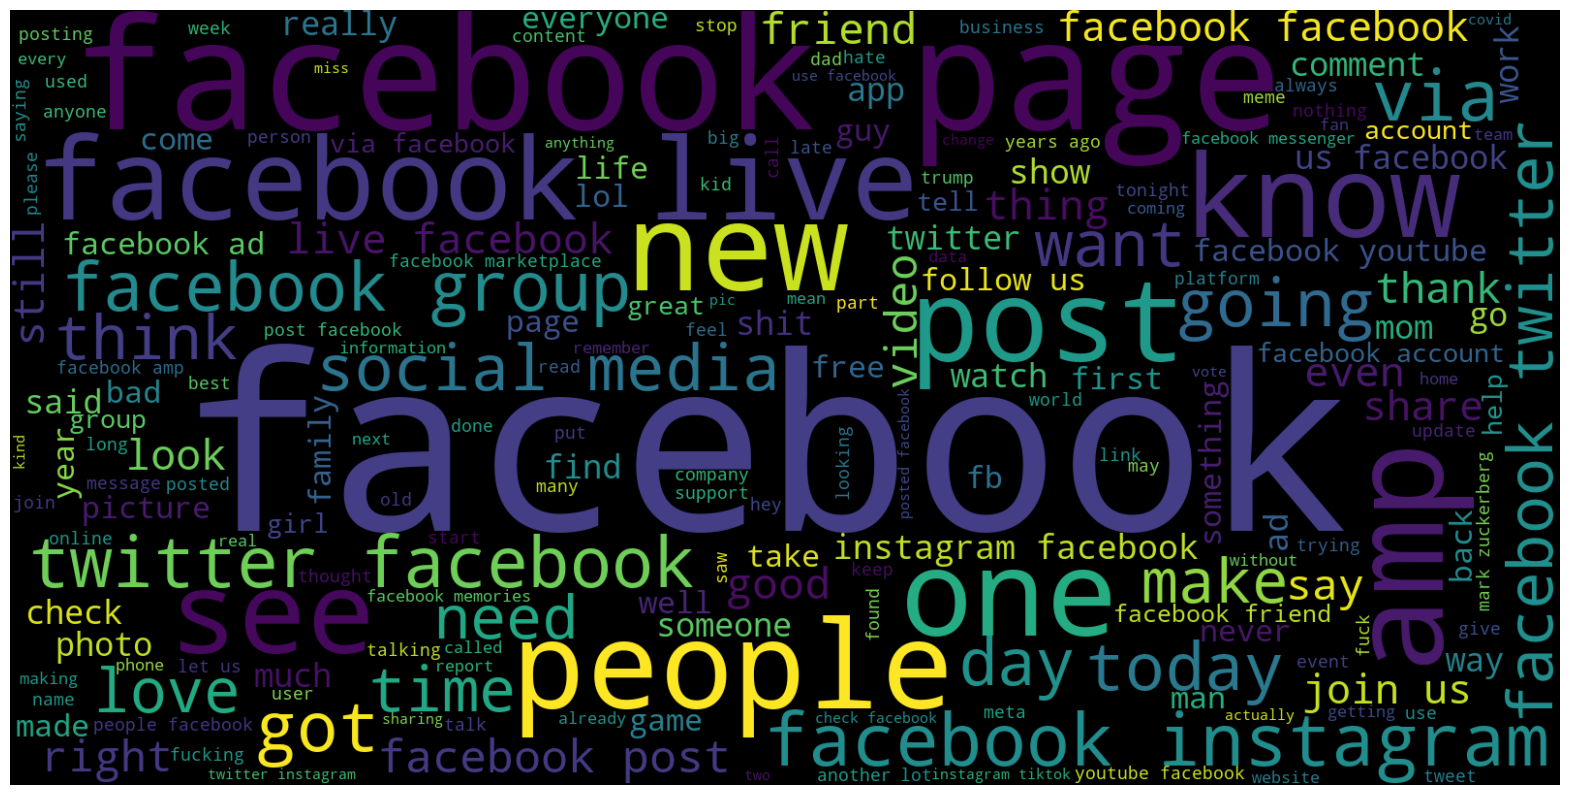

In [12]:
words = ' '.join([tweets for tweets in df['Tweet']])
plt.figure(figsize = (20,15))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21).generate(words)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Como era de suponer, la palabra que más relevancia presenta es facebook, y luego las palabras people, page, post y one. Lo cual nos da un indicativo de que los comentarios relevantes serán los que hacen referencia a como las personas se sienten con lo que sucede alrededor de facebook.</i></p>
</div>

<h1>Divide tu data para entrenar el modelo y poder hacer pruebas de los modelos</h1>

In [13]:
X_train, X_val, y_train, y_val = train_test_split(df["Tweet"], df["Sentiment"], test_size=0.2, random_state=RANDOMSEED)
display(X_train.shape)
display(X_val.shape)

(66469,)

(16618,)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>La data está dividida en un 80% para entrenamiento y un 20% para pruebas, como recomiendan las mejores prácticas para estos casos.</i></p>
</div>

<h2>Extracción de Características</h2>

In [14]:
vect = TfidfVectorizer(sublinear_tf=True).fit(X_train)

feature_names = vect.get_feature_names_out()
display("Numero de features: {}".format(len(feature_names)))
X_train = vect.transform(X_train)

'Numero de features: 70605'

<h1>Entrenamiento de los modelos </h1>

In [15]:
def evaluate_model(predictions, train_predictions):
    """Comparar el rendimiento del modelo de aprendizaje automático con la referencia. Calculo estadísticos y Muestra de la curva ROC."""
    
    results = {}
    results['acurracy'] = accuracy_score(predictions, y_val)

    train_results = {}
    train_results['acurracy'] = accuracy_score(train_predictions, y_train)

    for metric in ['acurracy']:
        display(f'Comparación {metric.capitalize()} - Prueba: {round(results[metric], 2)} Entrenamiento: {round(train_results[metric], 2)}')

    display('Reporte de Prueba')
    print(classification_report(y_val, predictions))
    display('Reporte de Entrenamiento')
    print(classification_report(y_train, train_predictions))

    return accuracy_score(predictions, y_val)

In [16]:
def plot_confusion_matrix(predictions):

    cm = confusion_matrix(y_val, predictions)
    classes = ['Negativo', 'Neutro', 'Positivo']

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    plt.title('Matriz de confusión', size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta predicha')

<h2>Linear Support Vector Classifier (SVM)</h2>

Vamos a definir el primer modelo a entrenar. 

In [17]:
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


'Comparación Acurracy - Prueba: 0.95 Entrenamiento: 0.99'

'Reporte de Prueba'

              precision    recall  f1-score   support

    Negative       0.94      0.89      0.91      3403
     Neutral       0.95      0.98      0.97      5880
    Positive       0.96      0.96      0.96      7335

    accuracy                           0.95     16618
   macro avg       0.95      0.94      0.95     16618
weighted avg       0.95      0.95      0.95     16618



'Reporte de Entrenamiento'

              precision    recall  f1-score   support

    Negative       0.98      0.99      0.98     13654
     Neutral       1.00      0.99      0.99     23775
    Positive       0.99      1.00      0.99     29040

    accuracy                           0.99     66469
   macro avg       0.99      0.99      0.99     66469
weighted avg       0.99      0.99      0.99     66469



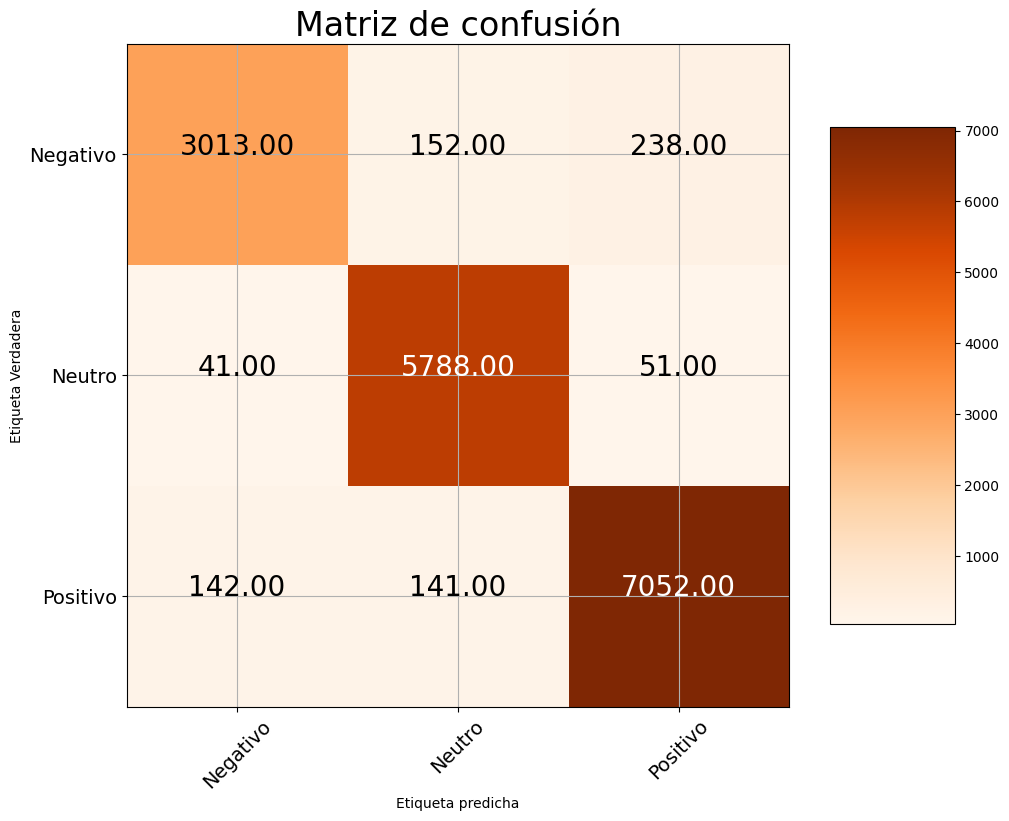

In [18]:
train_predictions_svm = model_svm.predict(X_train)
predictions_svm = model_svm.predict(vect.transform(X_val))

acurracy_svm = evaluate_model(predictions_svm, train_predictions_svm)
plot_confusion_matrix(predictions_svm)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Analizando los resultados de rendimiento del modelo SVM podemos observar que tiene una precición del 95% con el conjunto de pruebas, lo cual indica que el modelo es bueno ya que en promedio el 95% de los casos categorizados por el modelo corresponden a su verdader categoría.</i></p>
<p><i>También debemos analizar el indicador Recall ya que para la categoría Negative presenta un valor de 89% lo cual está bastante alejado de los valores para las demás categorías, esto nos indica que el modelo clasificó un 89% de mensajes como Negative y de estos el 94% eran realmente Negative, con lo cual se le pasó un 11% de mensajes negativos y además clasificó de manera errónea un 6% de los mensajes clasificados como negativos.</i></p>
</div>

<h2>Regresión Logística</h2>

Vamos a definir el segundo modelo a entrenar.

In [19]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


'Comparación Acurracy - Prueba: 0.92 Entrenamiento: 0.96'

'Reporte de Prueba'

              precision    recall  f1-score   support

    Negative       0.93      0.78      0.85      3403
     Neutral       0.89      0.98      0.94      5880
    Positive       0.94      0.94      0.94      7335

    accuracy                           0.92     16618
   macro avg       0.92      0.90      0.91     16618
weighted avg       0.92      0.92      0.92     16618



'Reporte de Entrenamiento'

              precision    recall  f1-score   support

    Negative       0.96      0.88      0.92     13654
     Neutral       0.95      0.99      0.97     23775
    Positive       0.96      0.97      0.97     29040

    accuracy                           0.96     66469
   macro avg       0.96      0.94      0.95     66469
weighted avg       0.96      0.96      0.96     66469



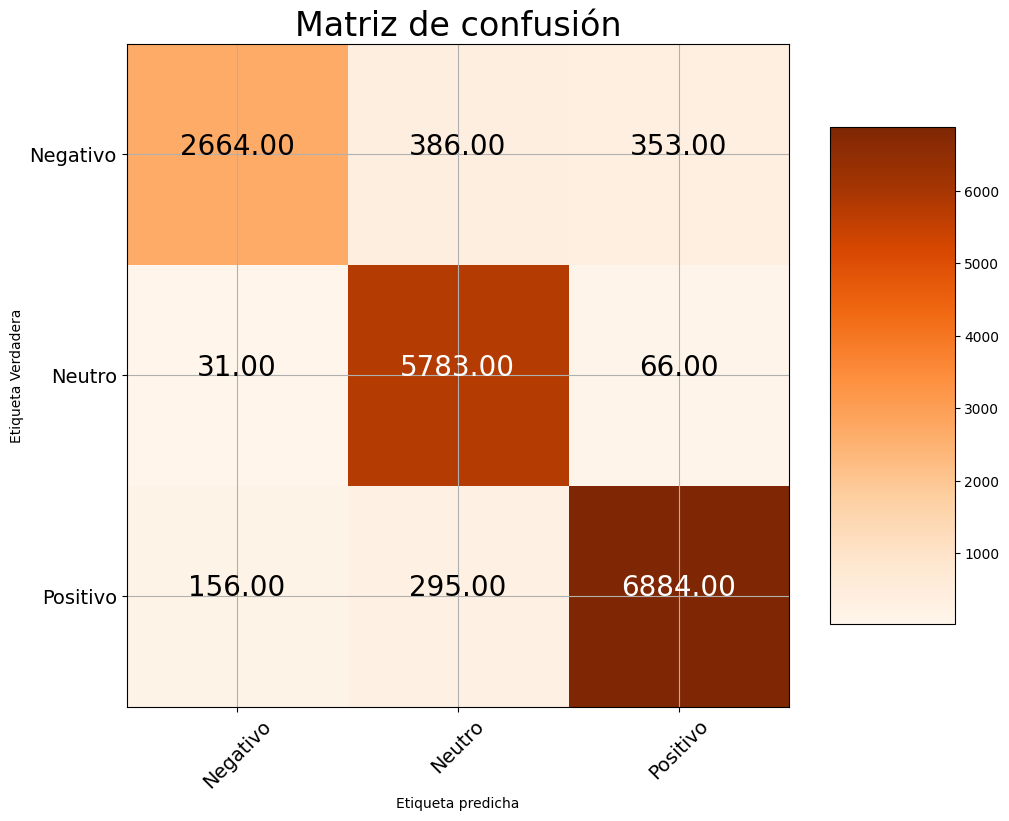

In [20]:
train_predictions_lr = model_lr.predict(X_train)
predictions_lr = model_lr.predict(vect.transform(X_val))

acurracy_lr = evaluate_model(predictions_lr, train_predictions_lr)
plot_confusion_matrix(predictions_lr)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Analizando los resultados para el modelo de Regresión Lineal observamos que los valores de precisión y recall bajan respecto al modelo de SVM presentando un 92% y un 90% respectivamente.</i></p>
<p><i>Se puede observar además que los valores para la categoría Negative son los que más bajan con lo cual, podríamos decir que el modelo SVM es el más indicado, pero aún debemos analizar otro modelo para llegar a una conclusión final.</i></p>
</div>

<h2>Multinomial Naive Bayes</h2>

Vamos a definir el tercer modelo a entrenar. 

'Comparación Acurracy - Prueba: 0.64 Entrenamiento: 0.74'

'Reporte de Prueba'

              precision    recall  f1-score   support

    Negative       0.98      0.22      0.37      3403
     Neutral       0.88      0.45      0.59      5880
    Positive       0.56      0.98      0.71      7335

    accuracy                           0.64     16618
   macro avg       0.80      0.55      0.56     16618
weighted avg       0.76      0.64      0.60     16618



'Reporte de Entrenamiento'

              precision    recall  f1-score   support

    Negative       0.99      0.36      0.53     13654
     Neutral       0.94      0.67      0.78     23775
    Positive       0.64      0.99      0.78     29040

    accuracy                           0.74     66469
   macro avg       0.86      0.67      0.70     66469
weighted avg       0.82      0.74      0.73     66469



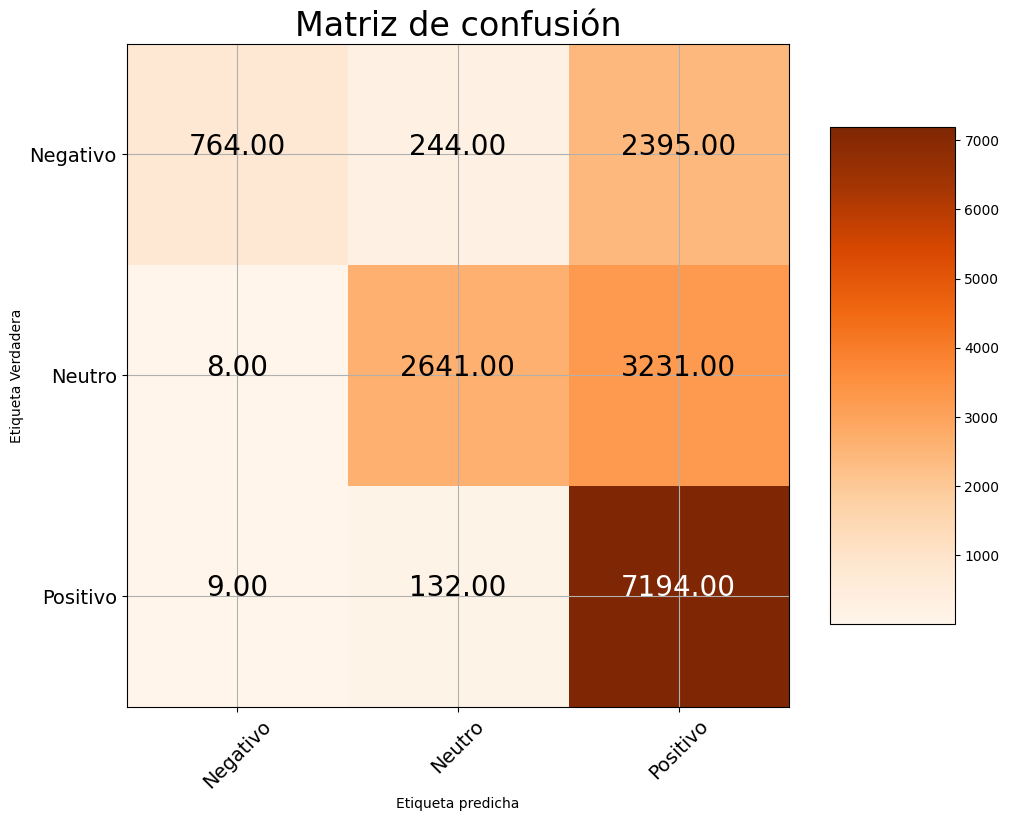

In [21]:
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

train_predictions_nb = model_nb.predict(X_train)
predictions_nb = model_nb.predict(vect.transform(X_val))

acurracy_nb = evaluate_model(predictions_nb, train_predictions_nb)
plot_confusion_matrix(predictions_nb)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>El modelo de Multinomial Naive Bayes presenta resultados realmente peores que los dos modelos anteriores, inclusive para la categoría Negative son aún peores presentando un recall de 22%, con esto estamos más seguros al indicar que el modelo SVM es el más indicado.</i></p>
</div>

<h1>Resultado</h1>

Muestra un resumen de los resultados de todos los modelos

<Axes: >

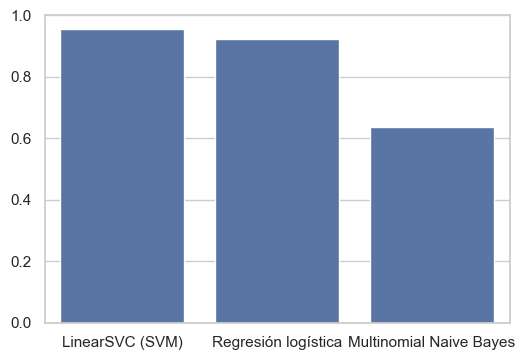

In [22]:
models = ['LinearSVC (SVM)', 'Regresión logística', 'Multinomial Naive Bayes']
values = np.array([acurracy_svm, acurracy_lr, acurracy_nb])
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.barplot(x=models, y=values)

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Luego de los resultados obtenidos con los tres modelos, escogemos el modelo SVM como el adecuado para trabajar con este set de datos y realizar el análisis de sentimiento sobre los mensajes que exponen los usuarios en la red social Twitter.</i></p>
</div>

<h2>Pruebas</h2>

Realiza una pruebas del sistema de recomendación simulando ser el usuario -8845298781299428018 para evaluar las recomendaciones de cada modelo.

In [23]:
before_df = pd.read_csv(r'C:\Users\arbed\Downloads\sentanal\before.csv')
layoff_df = pd.read_csv(r'C:\Users\arbed\Downloads\sentanal\layoff.csv')
after_df = pd.read_csv(r'C:\Users\arbed\Downloads\sentanal\after.csv')
display(before_df.head())
display(layoff_df.head())
display(after_df.head())

,User,Date Created,Tweet
0,marisainpink,2022-01-01 23:59:56+00:00,I was unprepared for the shocking information ...
1,OfficialNWCA1,2022-01-01 23:59:45+00:00,What a piece posted by Wes today on Facebook! ...
2,_MattRoy,2022-01-01 23:59:38+00:00,Currently following a 156-comment long Faceboo...
3,NBCCH20,2022-01-01 23:59:36+00:00,FOLLOW US ON SOCIAL MEDIA:\nTwitter - https://...
4,hxneyfarmer,2022-01-01 23:59:15+00:00,it’s 2022 and bitches from the midwest who wen...


,User,Date Created,Tweet
0,thecolumbian,2023-03-31 23:11:02+00:00,SEATTLE —Dozens of food service employees work...
1,KellogSully,2023-03-31 19:25:01+00:00,@EndGameWW3 @johnbruso I don’t want to tell yo...
2,ZeroNorth11,2023-03-31 19:00:02+00:00,Tech industry takes another hit as Amazon and ...
3,lovexniss,2023-03-31 17:27:23+00:00,@_Vickaaaye I’ve had Facebook recruiters in my...
4,HEIR_less,2023-03-31 16:13:34+00:00,Man Facebook did a major layoff yesterday. Now...


,User,Date Created,Tweet
0,NIRMALK98689924,2022-11-01 23:59:54+00:00,Youtube|Facebook|LIVE https://t.co/H0n2AQ5WPL
1,selormfx,2022-11-01 23:59:51+00:00,All it takes is 6 months to learn a skill that...
2,sokchhai,2022-11-01 23:59:49+00:00,Please help to follow my page Facebook and You...
3,FantasciWorld,2022-11-01 23:59:46+00:00,#imf #goldmansachs #wef #cbdc want unelected o...
4,treeckobot,2022-11-01 23:59:37+00:00,Visit our facebook page format


In [24]:
before_df = before_df[['Tweet']]
before_df.Tweet = before_df['Tweet'].apply(data_cleaning)
before_df = before_df.drop_duplicates('Tweet')
display(before_df.shape)
display(before_df.head())

(12515, 1)

,Tweet
0,unprepared shocking information facebook timel...
1,piece posted wes today facebook canadian ivan ...
2,currently following comment long facebook argu...
3,follow us social media twitter facebook youtub...
4,bitches midwest went senior prom camo still po...


In [25]:

layoff_df = layoff_df[['Tweet']]
layoff_df.Tweet = layoff_df['Tweet'].apply(data_cleaning)
layoff_df = layoff_df.drop_duplicates('Tweet')
display(layoff_df.shape)
display(layoff_df.head())

(7700, 1)

,Tweet
0,seattle dozens food service employees working ...
1,want tell would cash monetary changes coming f...
2,tech industry takes another hit amazon faceboo...
3,facebook recruiters inbox rounds layoffs like ...
4,man facebook major layoff yesterday ea know pe...


In [26]:
after_df = after_df[['Tweet']]
after_df.Tweet = after_df['Tweet'].apply(data_cleaning)
after_df = after_df.drop_duplicates('Tweet')
display(after_df.shape)
display(after_df.head())

(10945, 1)

,Tweet
0,youtubefacebooklive
1,takes months learn skill change life digital m...
2,please help follow page facebook youtube thank...
3,imf goldmansachs wef cbdc want unelected oliga...
4,visit facebook page format


<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Una vez que los datos están preparados luego de aplicar la limpieza de los mismos, procedemos a evaluar los datos con el modelo seleccionado SVM.</i></p>
</div>

In [27]:
before_df['Sentiment'] = model_svm.predict(vect.transform(before_df['Tweet']))
display(before_df.shape)
display(before_df.head())

(12515, 2)

,Tweet,Sentiment
0,unprepared shocking information facebook timel...,Negative
1,piece posted wes today facebook canadian ivan ...,Positive
2,currently following comment long facebook argu...,Positive
3,follow us social media twitter facebook youtub...,Positive
4,bitches midwest went senior prom camo still po...,Negative


<Axes: xlabel='Sentiment', ylabel='count'>

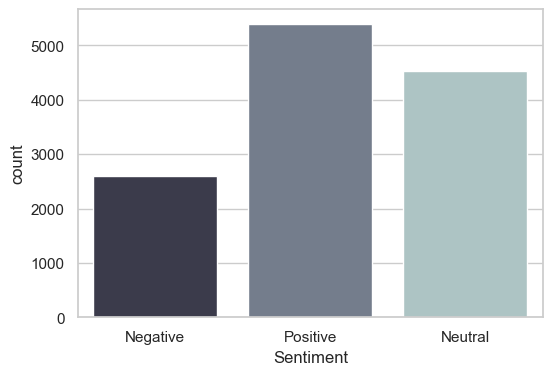

In [28]:
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.countplot(data=before_df, x="Sentiment", hue='Sentiment', palette='bone')

In [29]:
layoff_df['Sentiment'] = model_svm.predict(vect.transform(layoff_df['Tweet']))
display(layoff_df.shape)
display(layoff_df.head())

(7700, 2)

,Tweet,Sentiment
0,seattle dozens food service employees working ...,Neutral
1,want tell would cash monetary changes coming f...,Neutral
2,tech industry takes another hit amazon faceboo...,Positive
3,facebook recruiters inbox rounds layoffs like ...,Positive
4,man facebook major layoff yesterday ea know pe...,Negative


<Axes: xlabel='Sentiment', ylabel='count'>

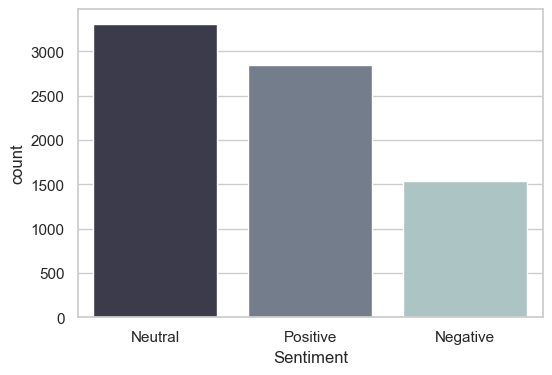

In [30]:
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.countplot(data=layoff_df, x="Sentiment", hue='Sentiment', palette='bone')

In [31]:
after_df['Sentiment'] = model_svm.predict(vect.transform(after_df['Tweet']))
display(after_df.shape)
display(after_df.head())

(10945, 2)

,Tweet,Sentiment
0,youtubefacebooklive,Neutral
1,takes months learn skill change life digital m...,Neutral
2,please help follow page facebook youtube thank...,Neutral
3,imf goldmansachs wef cbdc want unelected oliga...,Neutral
4,visit facebook page format,Neutral


<Axes: xlabel='Sentiment', ylabel='count'>

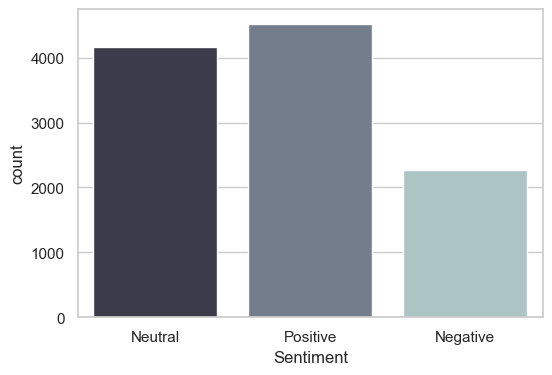

In [32]:
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})
sns.countplot(data=after_df, x="Sentiment", hue='Sentiment', palette='bone')

In [33]:
def determine_cr(df):
  pos = df[df.Sentiment == 'Positive']
  pos_count = len(pos.index)
  neg = df[df.Sentiment == 'Negative']
  neg_count = len(neg.index)
  cr = ((pos_count-neg_count)/(pos_count+neg_count))*100
  return cr

In [34]:
cr_before = determine_cr(before_df)
cr_layoff = determine_cr(layoff_df)
cr_after = determine_cr(after_df)

Text(0.5, 1.0, 'Comparaciones netas de reputación de marca')

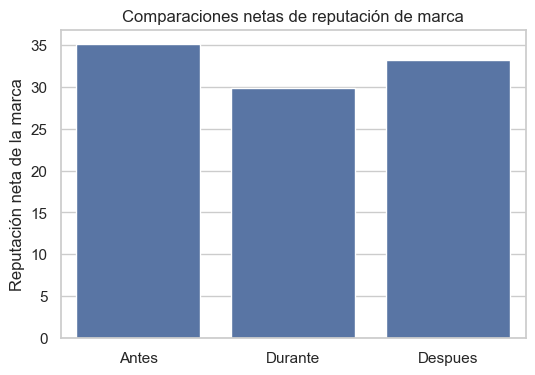

In [35]:
col = ['Antes', 'Durante', 'Despues']
values = np.array([cr_before, cr_layoff, cr_after])
sns.set_theme(style='whitegrid', rc={'figure.figsize':(6, 4)})  #  elige la apariencia
sns.barplot(x=col, y=values)
plt.ylabel("Reputación neta de la marca")
plt.title("Comparaciones netas de reputación de marca")

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Como se puede observar, si bien la reputación de Facebook sufrió una baja en su calificación, no fue tan significativa como se hubiese esperado luego de realizar los despidos masivos.</i></p>
</div>

Text(631.9338235294118, 0.5, 'Total')

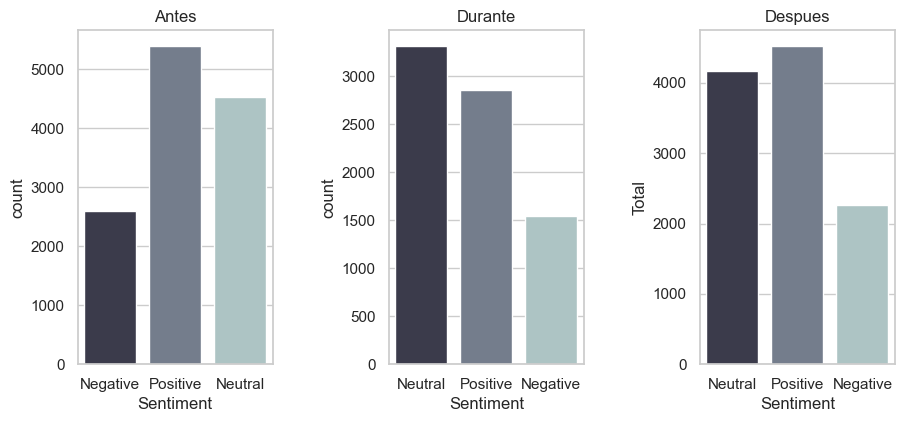

In [36]:
fig, ax = plt.subplots(1,3,figsize=(10,5))
fig.tight_layout(pad=4.0)
ax[0].title.set_text('Antes')
ax[1].title.set_text('Durante')
ax[2].title.set_text('Despues')
sns.countplot(x = 'Sentiment', hue = 'Sentiment', palette='bone', data = before_df, ax=ax[0])
sns.countplot(x = 'Sentiment', hue = 'Sentiment', palette='bone', data = layoff_df, ax=ax[1])
sns.countplot(x = 'Sentiment', hue = 'Sentiment', palette='bone', data = after_df, ax=ax[2])
plt.ylabel("Total")

<div class="alert alert-block alert-info">
<b><i>GRUPO 10</i></b> 
<p><i>Aquí se puede observar claramente que no creció el sentimiento negativo, más bien el mayor cambio fue en la categoría Neutral, aunque dicha categoría no se usa para calcular la reputación de la empresa si afecta en el cálculo pues resta valor a las otras dos categorías.</i></p>
</div>

<h1>Discusión y Conclusión</h1>

Presenta tus conclusiones sobre el trabajo llevado a cabo

* *El análisis de sentimiento en los mensajes de redes sociales no puede ser el único indicador para medir la reputación de una empresa pero tampoco debe faltar al momento de evaluar la reputación, ya que puede entregar información importante para definir la estrategia de la empresa luego de importantes sucesos.*
* *Para que el análisis de sentimiento de estos datos sean más confiables, las empresas deben impulsar a sus clientes a dejar comentarios en las redes sociales de la empresa para así inclusive impulsar la creación de nuevos productos o la innovación en los productos existenes.*
* *Estos análisis de sentimiento deberían realizarse con una data más detallada que nos permita medir por ejemplo la reputación de la marca por continente, región, país e inclusive por ciudad. Esto ayudaría a lanzar estrategias más localizadas o a retirar la marca de ciertos lugares por la negatividad con la que es recibida.*